
# Customer Churn Prediction — Analytics Foundation

## Business Objective
Predict high-risk customers and identify churn drivers to support retention strategy and revenue protection.  
This notebook provides the analytical foundation for a production ML system by validating data quality,
deriving business features, and extracting actionable insights that directly inform modeling and MLOps pipelines.

## Executive Summary
This analysis evaluates customer churn patterns to:
- Identify key drivers of churn
- Quantify risk across customer segments
- Engineer business-relevant features
- Prepare production-ready data for ML pipelines

**Key Insights**
- Month-to-month contracts exhibit the highest churn propensity
- Short-tenure customers are significantly more likely to leave
- Electronic check users show elevated churn risk
- Revenue at risk is concentrated within the first six months of tenure

These findings directly inform feature engineering, model design, and retention strategies in the end-to-end ML system.


## Project Approach & System Design

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

EDA Pipeline Summary (One-Line)

Data Ingestion → Audit → Cleaning → Feature Grouping → Univariate → Bivariate → Multivariate → Outliers → Imbalance → Feature Strategy → Insights

### 1. Problem statement
- Developed a machine learning model to predict customer churn using historical customer, service usage, and billing data to support proactive retention strategies.


### 2. Data Collection
- Dataset Source - https://www.kaggle.com/datasets/blastchar/telco-customer-churn
- The data consists of 31 column and 7043 rows.

## 3. EDA Pipeline for Customer Churn Prediction

### Phase 1: Data Ingestion
- Objective: Load and validate raw data.
    - Load dataset from CSV/Excel
    - Verify file integrity
    - Inspect shape and column names
- Output: Raw dataframe

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv(r'C:\Users\USER\Desktop\customer-churn-mlops\data\raw\Telco-Customer-Churn.csv')

In [7]:
df = data.copy()

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.shape

(7043, 21)

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- Column Descriptions

| Column Name          | Description                                                                                 |
| -------------------- | ------------------------------------------------------------------------------------------- |
| **customerID**       | Unique identifier assigned to each customer                                                 |
| **gender**           | Customer gender (Male, Female)                                                              |
| **SeniorCitizen**    | Indicates whether the customer is a senior citizen (1 = Yes, 0 = No)                        |
| **Partner**          | Indicates whether the customer has a partner (Yes, No)                                      |
| **Dependents**       | Indicates whether the customer has dependents (Yes, No)                                     |
| **tenure**           | Number of months the customer has stayed with the company                                   |
| **PhoneService**     | Indicates whether the customer has phone service (Yes, No)                                  |
| **MultipleLines**    | Indicates whether the customer has multiple phone lines (Yes, No, No phone service)         |
| **InternetService**  | Type of internet service used (DSL, Fiber optic, No)                                        |
| **OnlineSecurity**   | Indicates whether the customer has online security service (Yes, No, No internet service)   |
| **OnlineBackup**     | Indicates whether the customer has online backup service (Yes, No, No internet service)     |
| **DeviceProtection** | Indicates whether the customer has device protection service (Yes, No, No internet service) |
| **TechSupport**      | Indicates whether the customer has technical support service (Yes, No, No internet service) |
| **StreamingTV**      | Indicates whether the customer has streaming TV service (Yes, No, No internet service)      |
| **StreamingMovies**  | Indicates whether the customer has streaming movie service (Yes, No, No internet service)   |
| **Contract**         | Type of customer contract (Month-to-month, One year, Two year)                              |
| **PaperlessBilling** | Indicates whether the customer uses paperless billing (Yes, No)                             |
| **PaymentMethod**    | Method of payment (Electronic check, Mailed check, Bank transfer, Credit card)              |
| **MonthlyCharges**   | Amount charged to the customer per month                                                    |
| **TotalCharges**     | Total amount charged to the customer over the tenure period                                 |
| **Churn**            | Target variable indicating whether the customer churned (Yes, No)                           |

- Dataset Consist 7043 rows and 21 columns

### Data Quality Assessment
- Objective: Understand structure and basic quality.
    - Data types inspection
    - Missing value overview
    - Duplicate check (customerID)
    - Basic statistics (numerical)

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
print('NO of Duplicateds is', df.duplicated().sum())

NO of Duplicateds is 0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- Decisions:
    - Columns needing type conversion
    - Obvious data quality issues

### Phase 3: Data Cleaning
- Objective: Fix inconsistencies and errors.

    - Handle missing values (impute/remove)
    - Convert TotalCharges to numeric
    - Remove duplicates
    - Standardize categorical values (Yes/No)
- Output: Cleaned dataframe

In [16]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# errors='coerce' -- This will convert non-numeric values (e.g., empty strings or whitespaces) into NaN (Not a Number) values.

In [17]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [18]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
# Fill Missing value using Median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [20]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
df['Partner'].unique()


array(['Yes', 'No'], dtype=object)

- good when column is more buth remove all column have categrogy more than 10 

        categorical_cols = df.select_dtypes(include='object').columns
        
        for col in categorical_cols:
            print(f"\nColumn: {col}")
            print(df[col].value_counts(dropna=False))


In [22]:
# inspect unique values for all columns

print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'SeniorCitizen' variable:  ",end=" ")
print(df['SeniorCitizen'].unique())

print("Categories in'Partner' variable:",end=" " )
print(df['Partner'].unique())

print("Categories in 'Dependents' variable:     ",end=" " )
print(df['Dependents'].unique())

print("Categories in 'PhoneService' variable:     ",end=" " )
print(df['PhoneService'].unique())

print("Categories in'MultipleLines' variable:",end=" " )
print(df['MultipleLines'].unique())

print("Categories in 'InternetService' variable:     ",end=" " )
print(df['InternetService'].unique())

print("Categories in 'OnlineSecurity' variable:     ",end=" " )
print(df['OnlineSecurity'].unique())

print("Categories in'OnlineBackup' variable:",end=" " )
print(df['OnlineBackup'].unique())

print("Categories in 'DeviceProtection' variable:     ",end=" " )
print(df['DeviceProtection'].unique())

print("Categories in 'TechSupport' variable:     ",end=" " )
print(df['TechSupport'].unique())

print("Categories in 'StreamingTV' variable:     ",end=" " )
print(df['StreamingTV'].unique())

print("Categories in 'StreamingMovies' variable:  ",end=" ")
print(df['StreamingMovies'].unique())

print("Categories in'Contract' variable:",end=" " )
print(df['Contract'].unique())

print("Categories in 'PaperlessBilling' variable:     ",end=" " )
print(df['PaperlessBilling'].unique())

print("Categories in'PaymentMethod' variable:",end=" " )
print(df['PaymentMethod'].unique())

Categories in 'gender' variable:      ['Female' 'Male']
Categories in 'SeniorCitizen' variable:   [0 1]
Categories in'Partner' variable: ['Yes' 'No']
Categories in 'Dependents' variable:      ['No' 'Yes']
Categories in 'PhoneService' variable:      ['No' 'Yes']
Categories in'MultipleLines' variable: ['No phone service' 'No' 'Yes']
Categories in 'InternetService' variable:      ['DSL' 'Fiber optic' 'No']
Categories in 'OnlineSecurity' variable:      ['No' 'Yes' 'No internet service']
Categories in'OnlineBackup' variable: ['Yes' 'No' 'No internet service']
Categories in 'DeviceProtection' variable:      ['No' 'Yes' 'No internet service']
Categories in 'TechSupport' variable:      ['No' 'Yes' 'No internet service']
Categories in 'StreamingTV' variable:      ['No' 'Yes' 'No internet service']
Categories in 'StreamingMovies' variable:   ['No' 'Yes' 'No internet service']
Categories in'Contract' variable: ['Month-to-month' 'One year' 'Two year']
Categories in 'PaperlessBilling' variable:    

- Insight:
    - NO Duplicates Value 
    - Convert dtype of TotalCharges to numerical
    - fill null value using median
    - Standardize categorical values i.e. inspect unique values for all columns

### Stage 4: Feature Categorization
- Objective: Organize variables for analysis.
    - Target variable: Churn
    - Numerical features: tenure, MonthlyCharges, TotalCharges
    - Categorical features: services, billing, demographics
    - Identifier to drop: customerID

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
# Drop customerID
df.drop(['customerID'], axis=1, inplace= True)

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
# define numerical, categorical columns, target
target = 'Churn'

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

cat_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

- define numerical & categorical columns

        numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
        categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

- print columns

        print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
        print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

###  Data Visualization 
### Stage 5: Univariate Analysis
- Objective: Understand individual feature behavior.
    - Numerical: distribution, skewness, outliers
    - Categorical: frequency, dominance
    - Target distribution (churn imbalance)

- Insights:
    - Skewed variables
    - Rare categories
    - Class imbalance level


| Minority Class % | Interpretation         |
| ---------------- | ---------------------- |
| 45% – 55%        | Balanced               |
| 30% – 45%        | Mild imbalance         |
| **20% – 30%**    | **Moderate imbalance** |
| < 10%            | Severe imbalance       |


In [27]:
# The target variable shows moderate class imbalance
df['Churn'].value_counts()
df['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

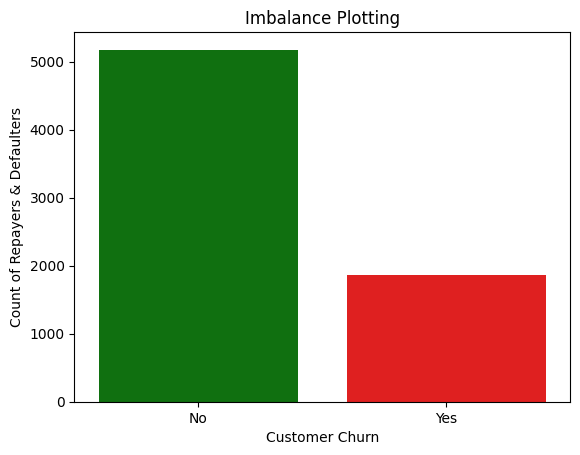

In [28]:
# Visualize
sns.countplot(x='Churn', data=df, palette= ['g','r'])
plt.xlabel("Customer Churn")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()


In [29]:
# Understand distribution shape and Detect skewness
num_summary = pd.DataFrame()

for col in num_cols:
    stats = df[col].describe()
    stats['skewness'] = df[col].skew()
    num_summary[col] = stats

num_summary

# If s

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000
skewness,0.239540,-0.220524,0.963789


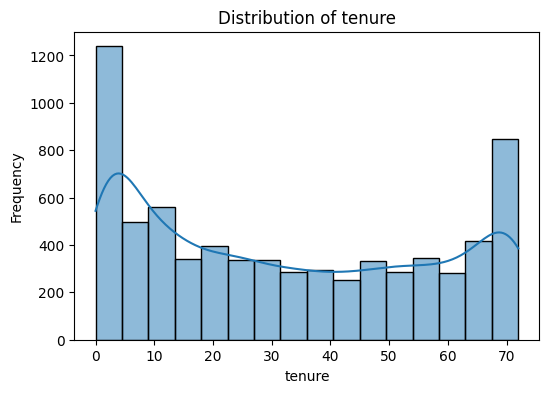

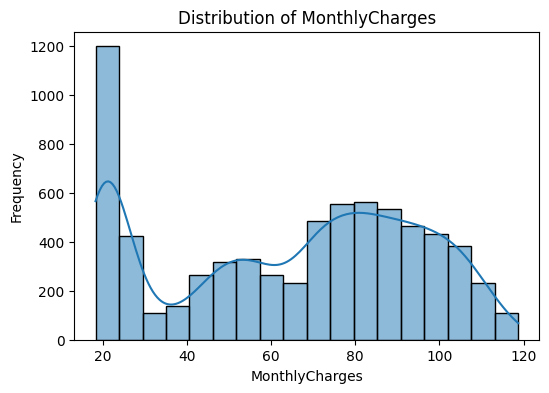

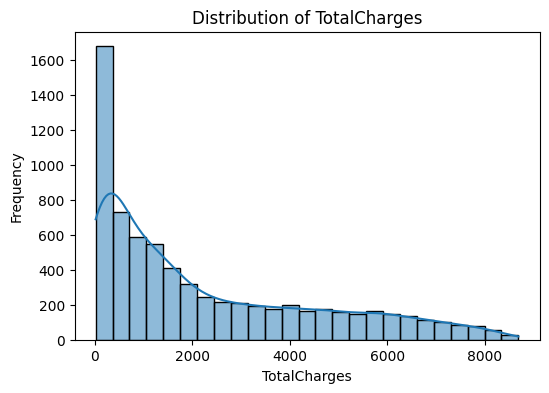

In [30]:
# Distribution Plot (Histogram + KDE) to ckeck skewness and distribution of graph
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [31]:
# Outlier Identification
outlier_summary = {}

for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = outliers.shape[0]

outlier_summary


{'tenure': 0, 'MonthlyCharges': 0, 'TotalCharges': 0}

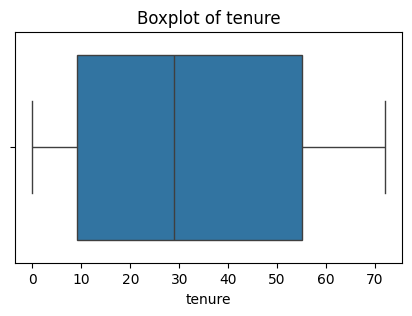

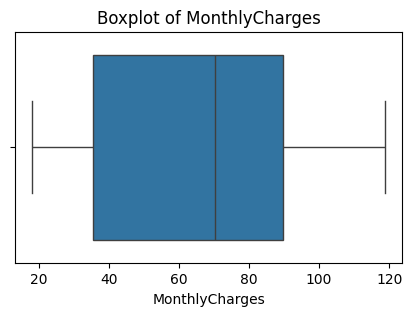

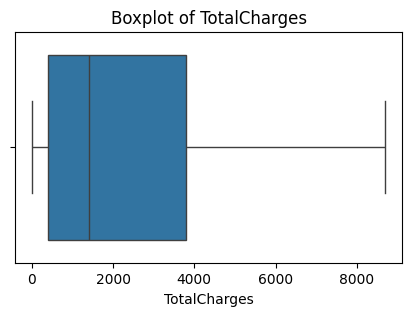

In [32]:
# Outlier Identification
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [33]:
# Understand category distribution and Identify dominant categories
cat_summary = {}

for col in cat_cols:
    counts = df[col].value_counts(normalize=True) * 100
    cat_summary[col] = counts.round(2)

cat_summary


{'gender': gender
 Male      50.48
 Female    49.52
 Name: proportion, dtype: float64,
 'SeniorCitizen': SeniorCitizen
 0    83.79
 1    16.21
 Name: proportion, dtype: float64,
 'Partner': Partner
 No     51.7
 Yes    48.3
 Name: proportion, dtype: float64,
 'Dependents': Dependents
 No     70.04
 Yes    29.96
 Name: proportion, dtype: float64,
 'PhoneService': PhoneService
 Yes    90.32
 No      9.68
 Name: proportion, dtype: float64,
 'MultipleLines': MultipleLines
 No                  48.13
 Yes                 42.18
 No phone service     9.68
 Name: proportion, dtype: float64,
 'InternetService': InternetService
 Fiber optic    43.96
 DSL            34.37
 No             21.67
 Name: proportion, dtype: float64,
 'OnlineSecurity': OnlineSecurity
 No                     49.67
 Yes                    28.67
 No internet service    21.67
 Name: proportion, dtype: float64,
 'OnlineBackup': OnlineBackup
 No                     43.84
 Yes                    34.49
 No internet service    2

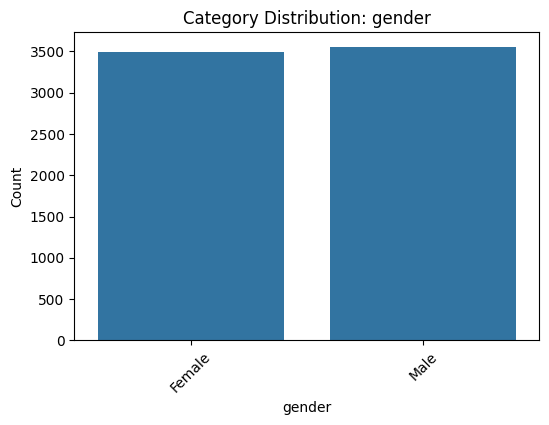

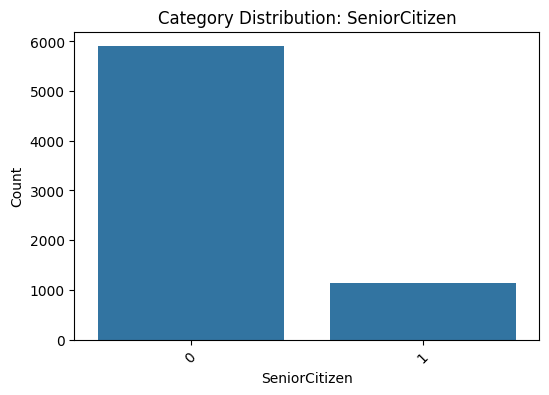

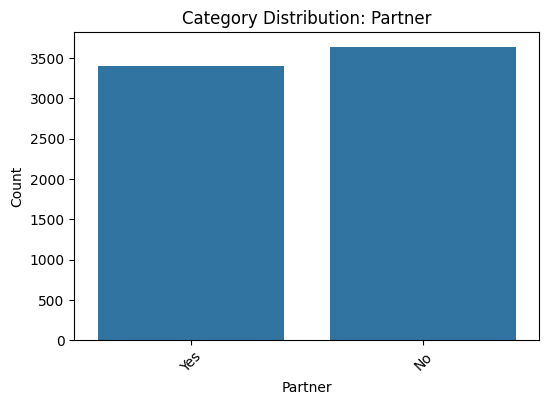

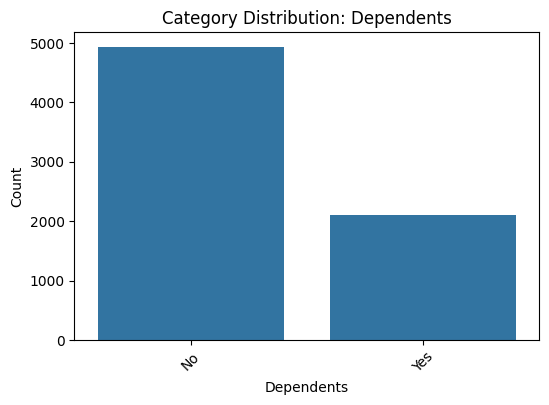

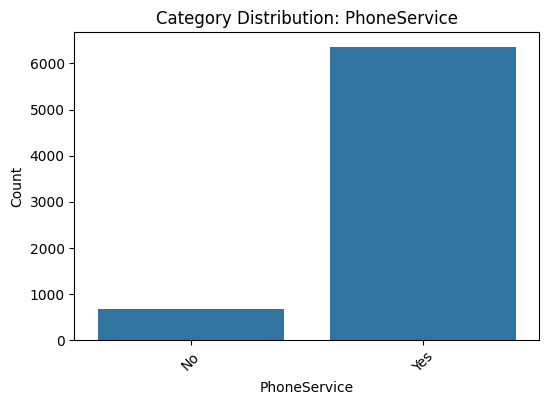

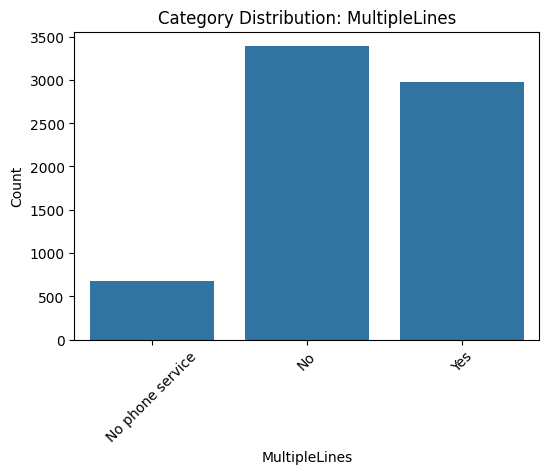

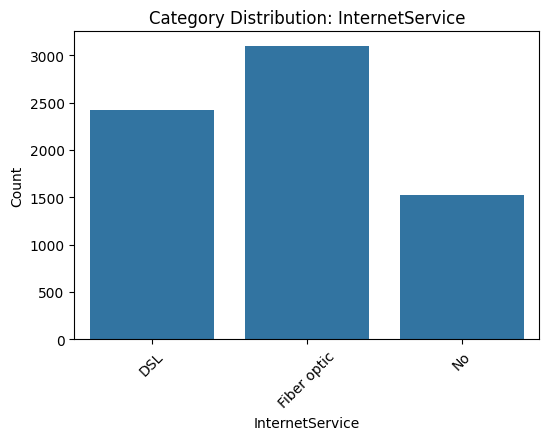

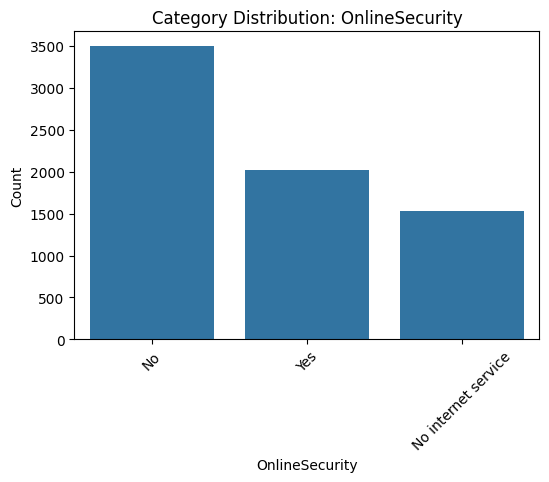

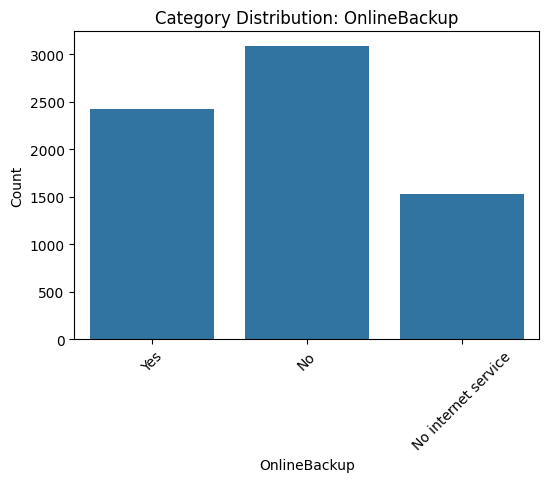

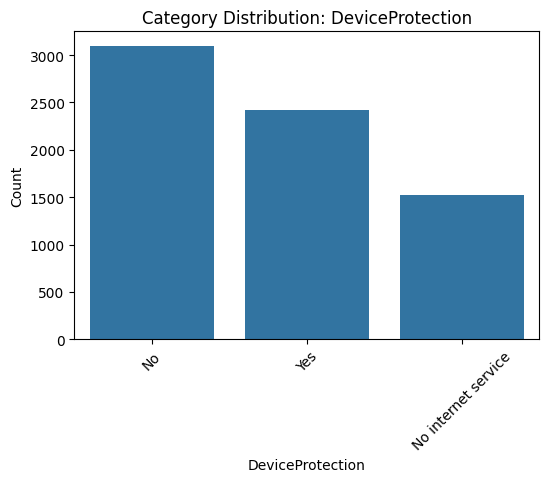

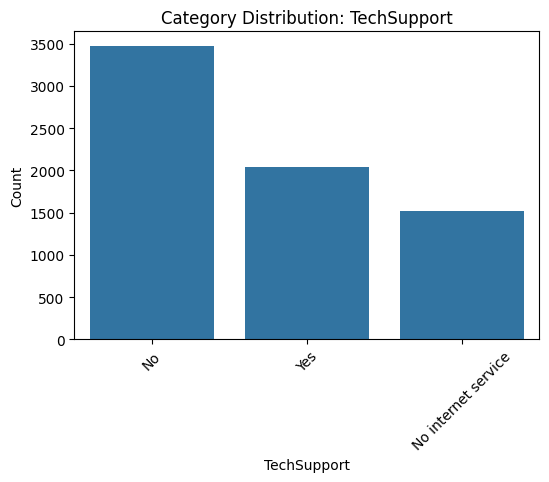

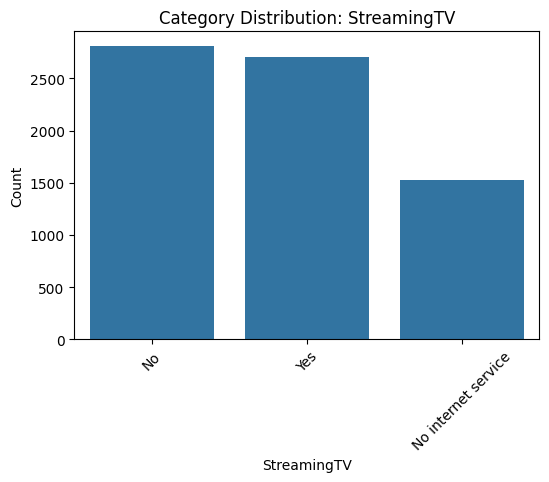

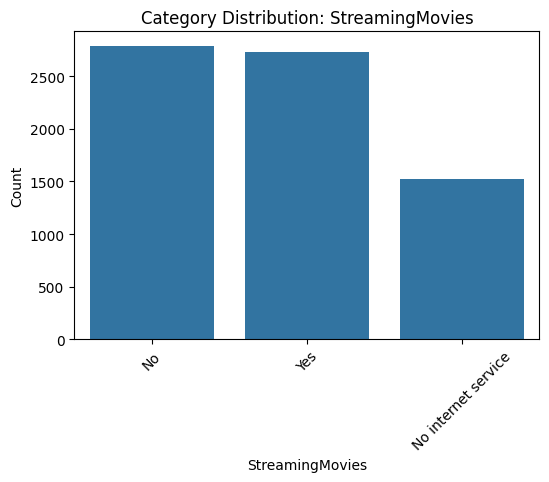

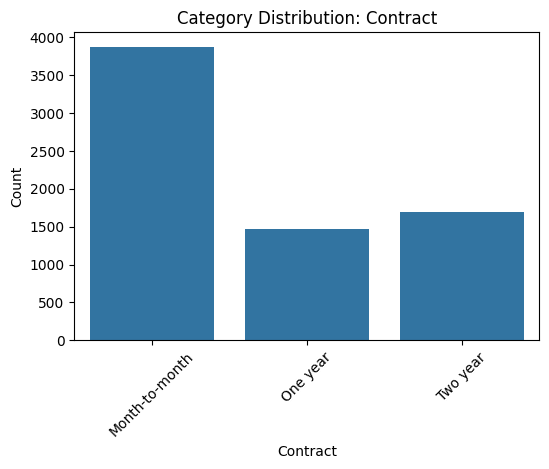

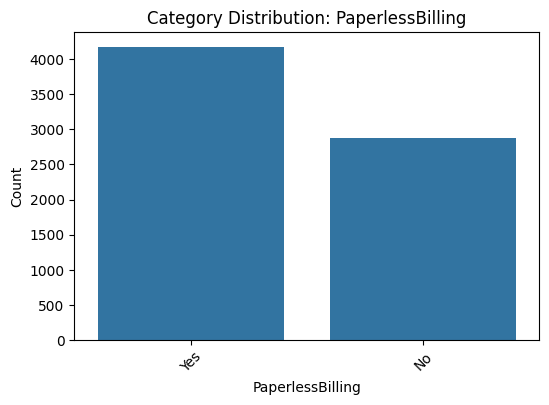

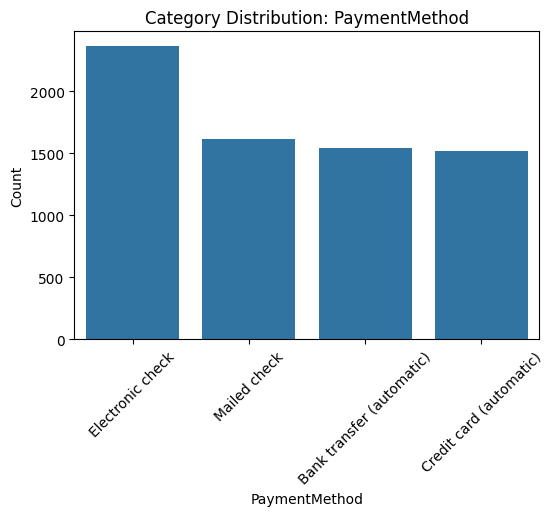

In [34]:
# same through graph 
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f'Category Distribution: {col}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()


EDA Insight (Stage 6):

- The SeniorCitizen feature shows a strong dominance of non-senior customers, indicating that senior citizens form a relatively small proportion of the dataset.
- large no. of  customer has online security service

### - Stage 6: Bivariate Analysis (Feature vs Target)

- Objective: Identify churn drivers.
- Churn rate by:
    - Contract type
    - Internet service
    - Payment method
- Numerical comparison:
    - tenure vs churn
    - MonthlyCharges vs churn
- Insights:
    - High-risk customer segments
    - Strong predictive variables

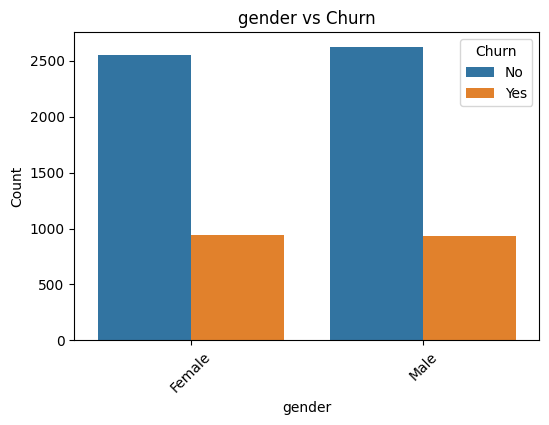

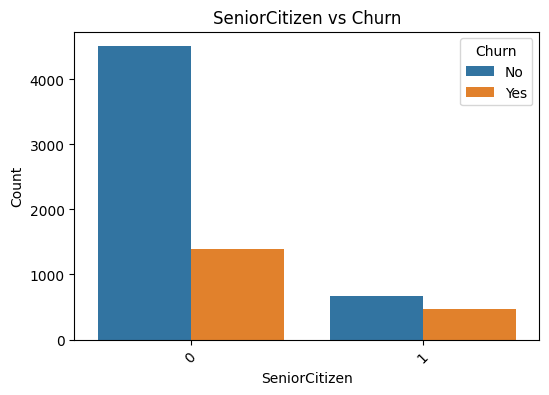

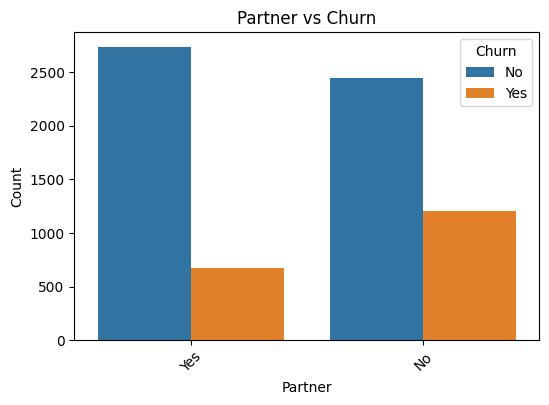

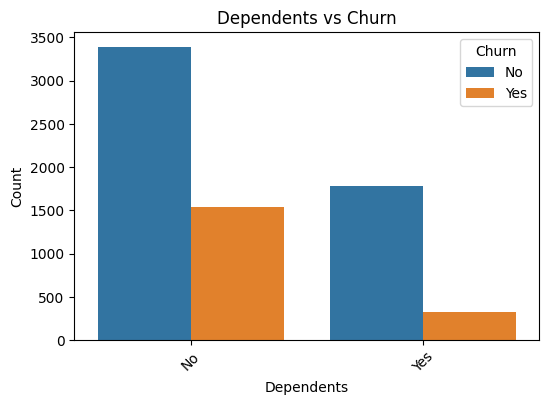

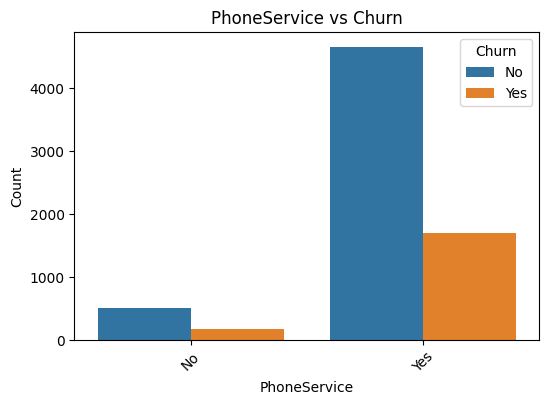

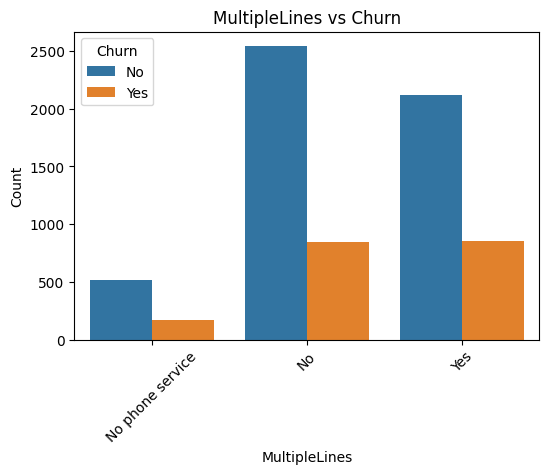

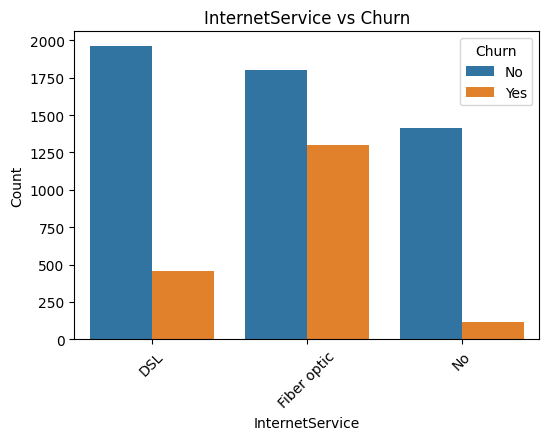

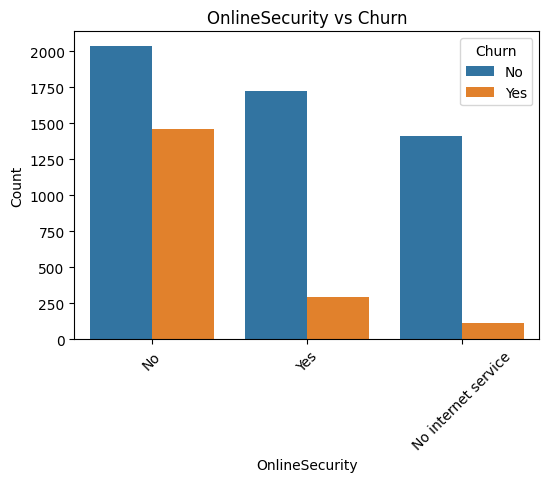

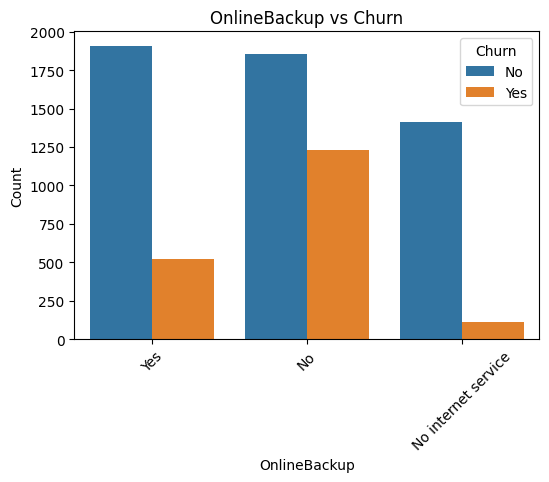

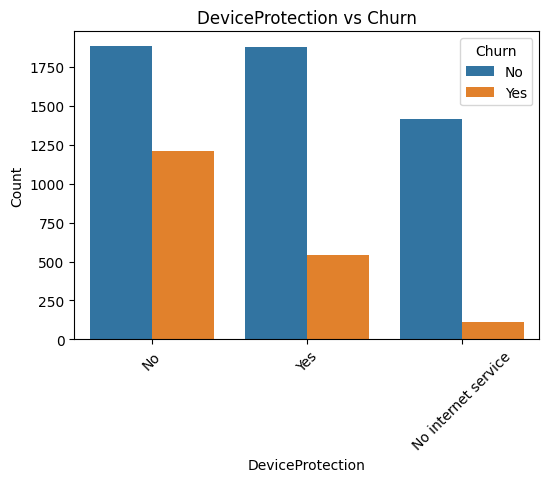

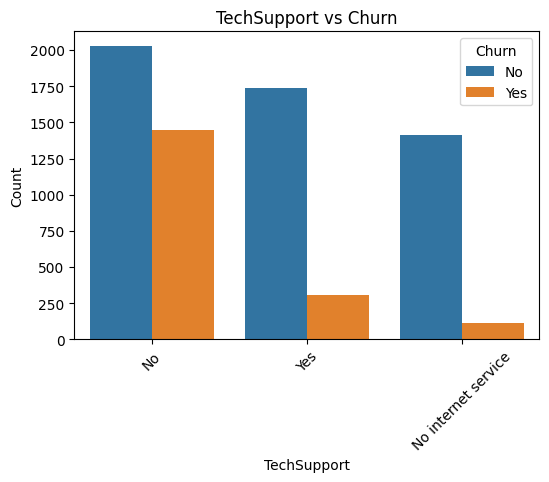

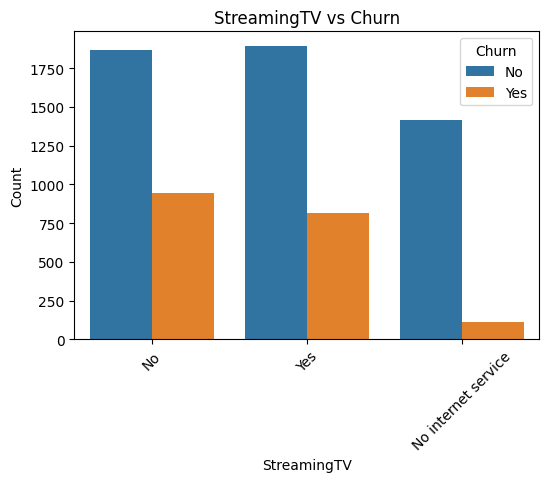

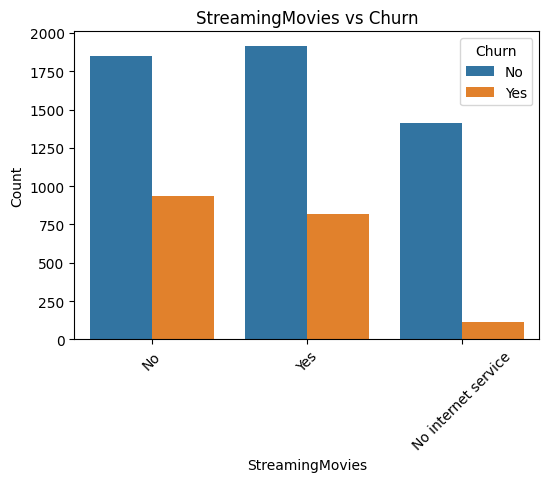

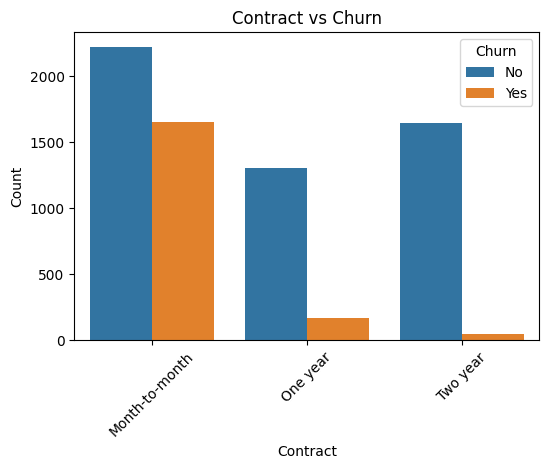

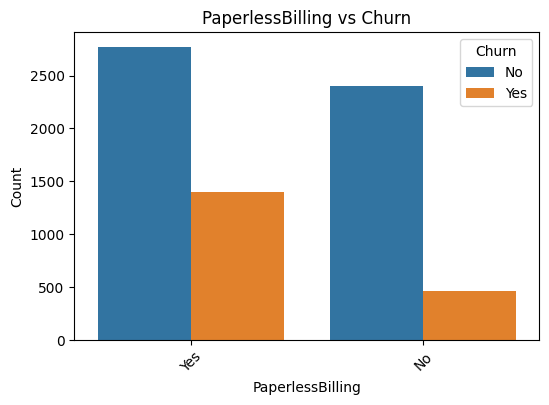

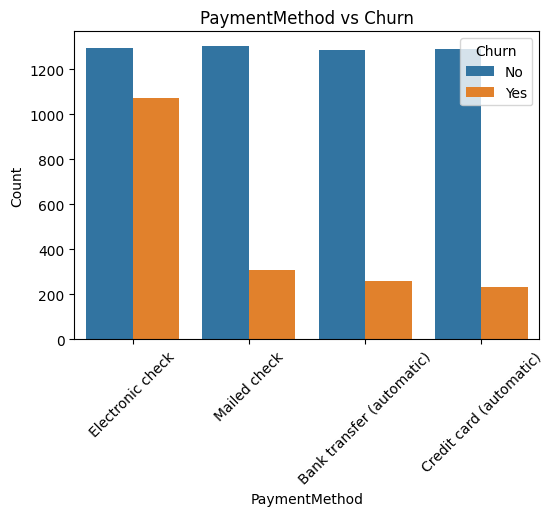

In [35]:
# Categorical Features vs Churn
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.show()


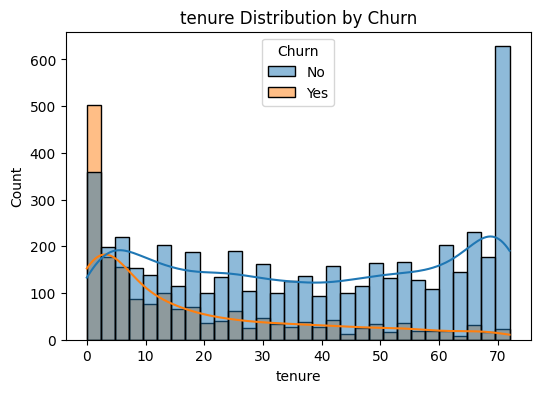

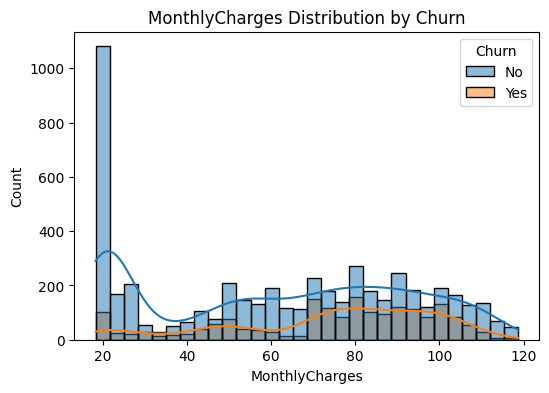

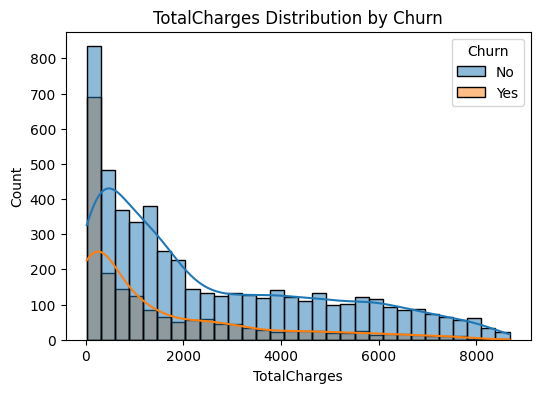

In [36]:
# Numerical Features vs Churn
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30)
    plt.title(f'{col} Distribution by Churn')
    plt.show()


### Stage 7: Multivariate Analysis
- Objective: Understand interactions.
    - Correlation matrix (numerical)
    - Feature combinations vs churn
    - Multicollinearity check
- Decisions:
    - Drop redundant features
    - Combine related features

- Understand relationships among multiple features, identify interactions, and detect multicollinearity that may affect model stability and interpretability.
- Key idea:
    - We analyze feature–feature relationships
    - Churn may be used only for grouping or interpretation, not for decisions yet

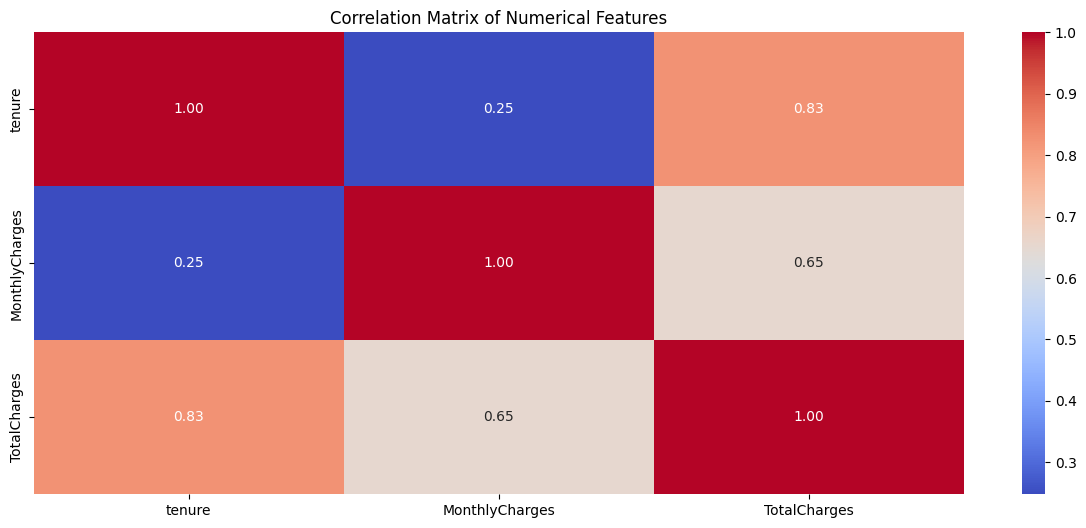

In [37]:
# Numerical Feature Correlation Matrix
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(15,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [38]:
interaction = (
    df.groupby(['Contract', 'InternetService'])['Churn']
      .value_counts(normalize=True)
      .rename('rate')
      .reset_index()
)

interaction[interaction['Churn'] == 'Yes']


,Contract,InternetService,Churn,rate
1,Month-to-month,DSL,Yes,0.322159
2,Month-to-month,Fiber optic,Yes,0.546053
5,Month-to-month,No,Yes,0.188931
7,One year,DSL,Yes,0.092982
9,One year,Fiber optic,Yes,0.192950
11,One year,No,Yes,0.024725
13,Two year,DSL,Yes,0.019108
15,Two year,Fiber optic,Yes,0.072261
17,Two year,No,Yes,0.007837


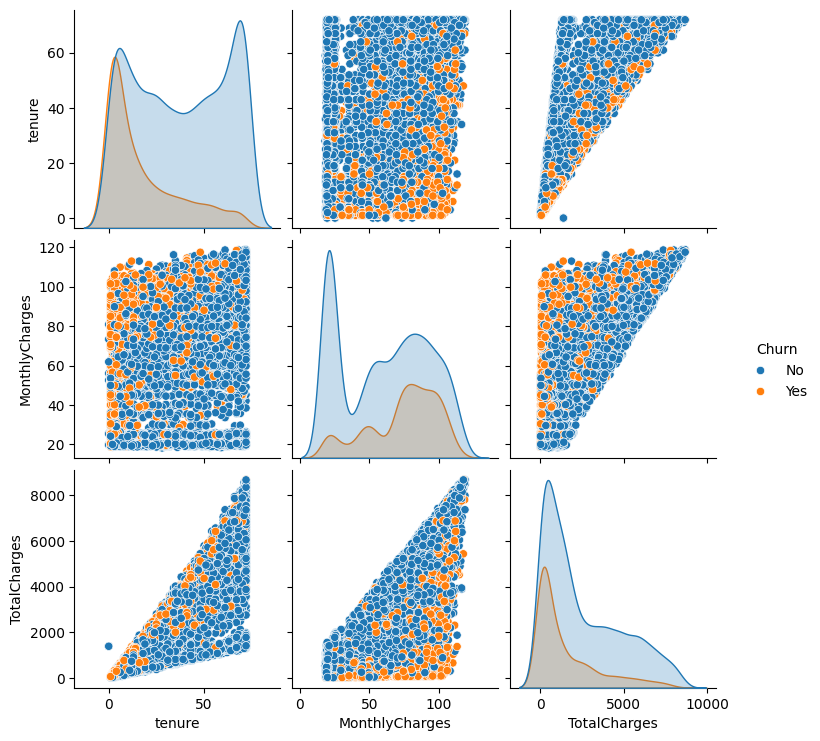

In [39]:
sns.pairplot(df[num_cols + ['Churn']], hue='Churn')
plt.show()

tenure and TotalCharges are usually highly correlated

### Stage 8: Outlier Analysis

- Objective: Detect extreme values.
    - Boxplots / IQR method
    - Business validation of outliers
- Decide: keep, cap, or remove

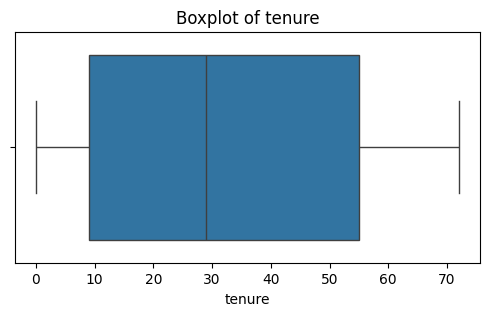

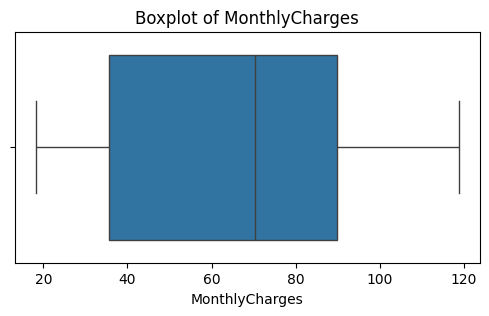

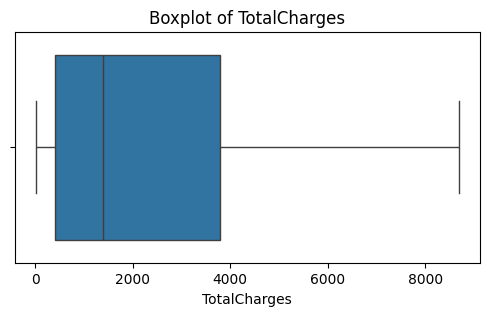

In [40]:
# Detect Outliers Using Boxplots
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [41]:
# Detect Outliers Using Boxplots
outlier_summary = {}

for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_summary[col] = count

outlier_summary


{'tenure': 0, 'MonthlyCharges': 0, 'TotalCharges': 0}

### Stage 9: Data Imbalance Assessment

- Objective: Prepare for modeling.
    - Churn vs non-churn ratio
- Decide need for resampling (later stage)

| Method          | Decision        |
| --------------- | --------------- |
| Class weights   | Yes (preferred) |
| SMOTE           | Optional        |
| Undersampling   | No              |
| Accuracy metric | Not sufficient  |


In [42]:
df['Churn'].value_counts()
df['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

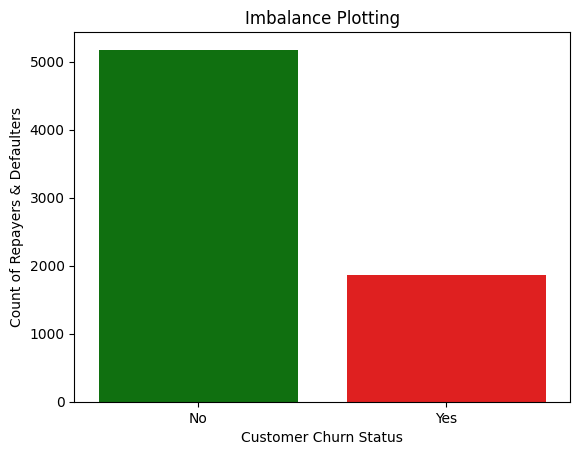

In [43]:
# Visualize
sns.countplot(x='Churn', data=df, palette= ['g','r'])
plt.xlabel("Customer Churn Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

### Phase 10: Data Preprocessing & Feature Engineering
- Objective
    - Transform the cleaned dataset into a model-ready feature matrix by:
    - Applying outlier decisions
    - Encoding categorical variables
    - Scaling numerical features
    - Creating meaningful derived features
    - Preventing data leakage

- Step 1: Drop Identifier Columns
- Step 2: Fix Data Types
- Step 3: Target Encoding (Binary) --> Convert target to numeric.
- Step 4: Outlier Treatment (As Decided in Stage 8)
- Step 5: Feature Engineering (Create New Features)
- Step 6: Separate Feature Groups
- Step 7: Encode Categorical Variables
- Step 8: Feature Scaling (Numerical)
- Step 9: Train–Test Split (No Leakage)
- Step 10: Handle Class Imbalance (As Decided in Stage 9)

In [44]:
# Convert target to numeric
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [45]:
# outlier
q1 = df['MonthlyCharges'].quantile(0.25)
q3 = df['MonthlyCharges'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df['MonthlyCharges'] = df['MonthlyCharges'].clip(lower, upper)

# tenure and TotalCharges are retained as-is (business-valid).

In [46]:
# Create columns AvgCharges
df['AvgCharges'] = df['TotalCharges'] / (df['tenure'] + 1)

#### Save Clean Data

In [47]:
import os

# Save cleaned dataset to project-level data/processed folder
clean_path = os.path.join("..", "data", "processed", "churn_clean.csv")

os.makedirs(os.path.dirname(clean_path), exist_ok=True)
df.to_csv(clean_path, index=False)

print("Clean dataset saved to:", os.path.abspath(clean_path))


Clean dataset saved to: c:\Users\USER\Desktop\customer-churn-mlops\data\processed\churn_clean.csv


In [55]:
df = pd.read_csv(r'C:\Users\USER\Desktop\customer-churn-mlops\data\processed\churn_clean.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,14.925000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,53.985714
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,36.050000
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,40.016304
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,50.550000


The following steps *demonstrate* how raw analytical data becomes **model-ready**.  
In the production system, the same logic will live in `src/preprocessing.py` and be executed by the training pipeline.

In [48]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Identify column types
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

num_cols, cat_cols


(Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'AvgCharges'],
       dtype='object'),
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object'))

In [49]:

# Build preprocessing pipelines
numeric_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

In [50]:

# Train-test split (stratified due to imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0
)

# Transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed.shape, X_test_processed.shape


((5634, 46), (1409, 46))

In [51]:

# Optional: Handle class imbalance (demonstration)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(
    X_train_processed, y_train
)

X_train_balanced.shape, y_train_balanced.value_counts()


((8278, 46),
 Churn
 0    4139
 1    4139
 Name: count, dtype: int64)

In [52]:

# Model-ready dataset artifacts (preview)
import numpy as np

np.save('data_X_train.npy', X_train_balanced)
np.save('data_y_train.npy', y_train_balanced)
np.save('data_X_test.npy', X_test_processed)
np.save('data_y_test.npy', y_test.values)

print("Model-ready datasets created (demonstration).")


Model-ready datasets created (demonstration).



## Conclusion & Next Steps

This exploratory analysis establishes a clear analytical and business foundation for a production-grade
Customer Churn Prediction system.

### What This Analysis Achieved
- Validated data quality and resolved core integrity issues (missing values, duplicates, inconsistencies)
- Identified the primary churn drivers, including:
  - Contract type (month-to-month customers at highest risk)
  - Customer tenure (early lifecycle churn concentration)
  - Payment method and service configuration
- Quantified business risk in terms of churn distribution and revenue exposure
- Defined feature engineering strategies aligned with real-world retention use cases

### How This Feeds the ML System
The insights from this notebook directly translate into the production pipeline:

| EDA Insight | Pipeline Implementation |
|-------------|-------------------------|
| High churn among short-tenure users | `tenure_group` feature |
| Contract type as a major driver | Binary contract flags |
| Skewed monetary features | Log/clip transformations |
| Class imbalance | Stratified split / class weights |
| Data quality issues | Automated validation rules |

### Next Phase
This notebook now hands off to the automated ML pipeline:

1. Data ingestion and schema validation  
2. Reproducible preprocessing and feature engineering  
3. Model training with experiment tracking (MLflow)  
4. Model evaluation and versioning  
5. API deployment (FastAPI) and containerization (Docker)  
6. CI/CD automation and monitoring  

At this point, the project transitions from *analysis* to a **production-ready machine learning system**.